### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

#Problem 1

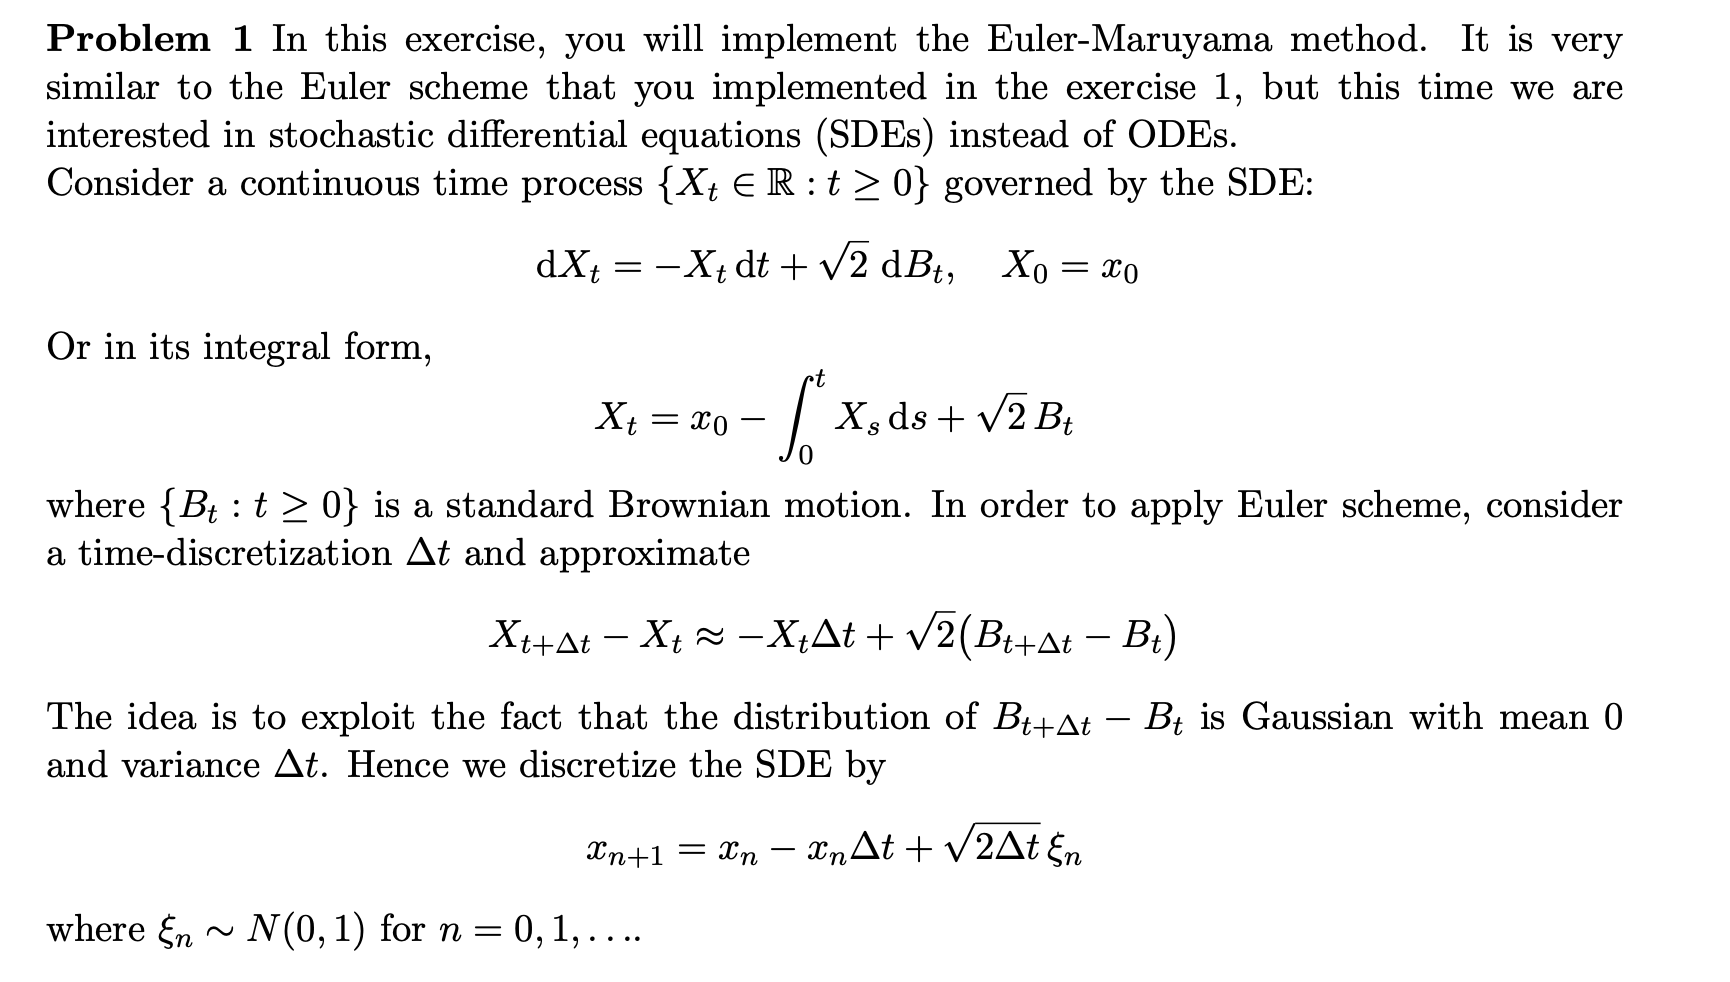

## Problem 1.1

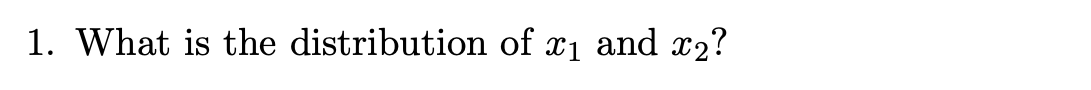

Given $X_0=x_0$, we have: <br>
1) $X_1=x_0(1-\Delta_t)+\sqrt{2\Delta t}N(0,1)\implies X_1\sim N(x_0(1-\Delta t),2\Delta t)$, since a linear transformation of a normal r.v is still a normal r.v. <br>
2) $X_2=X_1(1-\Delta_t)+\sqrt{2\Delta t}N(0,1)\implies X_2\sim N(x_0(1-\Delta t)^2,((1-\Delta t)^2+1)\Delta t)$, since the sum of two independent normal r.v is still a normal r.v.

## Problem 1.2

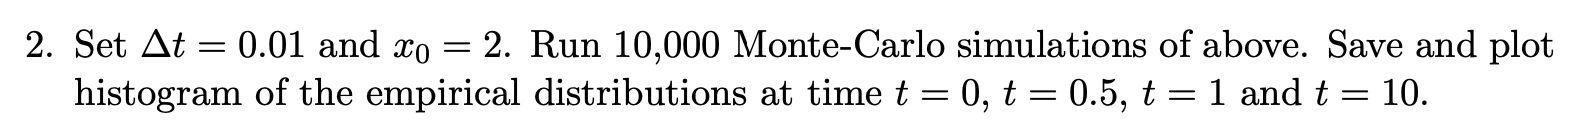

In [2]:
final_t = 10
dt = 0.01
x_n = 2 # value for x_0
num_sim = 10_000 #Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) #list or time steps to observe value on, we start with dt, since we are prefilling with x_0 already.

sim_mat = np.empty((num_sim,len(T)+1),dtype = 'float32') # Matrix to store each of 10K simulated processes

sim_mat[:, 0] = x_n #Settign initial x_0 for every simulation i.e value at t = 0
sim_mat[:,0], sim_mat.shape

(array([2., 2., 2., ..., 2., 2., 2.], dtype=float32), (10000, 1000))

In [3]:
# Simulating each individual process for dt time steps till final_t
for i in range(1,len(T)+1):
    # Getting the new x_n+1 for all simulations at time n, by utilizing the values of x at time n-1 basically following the equation
    # x_n+1 = x_n - x_n*dt + np.sqrt(2*dt)*np.random.randn()
    x_n_1 = sim_mat[:, i-1] - sim_mat[:, i-1] * dt + np.sqrt(2*dt) * np.random.randn(num_sim)

    # Setting the columns at nth time step with the obtained value
    sim_mat[:, i] = x_n_1

In [4]:
def hist_plt(time_points, sim_mat, bins, alp: float):
    num_plots = len(time_points)
    num_rows = int(np.ceil(np.sqrt(num_plots)))
    num_cols = int(np.ceil(num_plots / num_rows))

    # Get a colormap
    cmap = plt.get_cmap('tab10')

    # Get the corresponding colors from the colormap
    colors = [cmap(i % 10) for i in range(len(time_points))]

    # Iterate over the time points and plot histograms
    fig, axs = plt.subplots(num_rows, num_cols,figsize = (20,18))
    axs = axs.ravel()
    for i, t in enumerate(time_points):
        # Get the corresponding index in T
        t_index = int(t / dt)
        # Extract the values at the given time point
        if t_index > 0:
            values = sim_mat[:, t_index - 1]
        else:
            values = sim_mat[:, t_index]

        # Plot histogram with the random color
        sns.histplot(values, bins=bins, kde=True, alpha=alp, label=f't = {t}', color=colors[i], ax=axs[i], stat = 'density')

        # Add labels and legend
        axs[i].set(xlabel='Value', ylabel='Frequency')
        axs[i].legend()

    # Plot the normal distribution
    samples = np.random.randn(10000)
    i = len(time_points)
    sns.histplot(samples, bins=bins, kde=True, alpha=alp, label='Normal Distribution', color=cmap(i), ax=axs[i])
    axs[i].set(ylabel='Frequency')
    axs[i].legend()

    plt.tight_layout()
    plt.show()


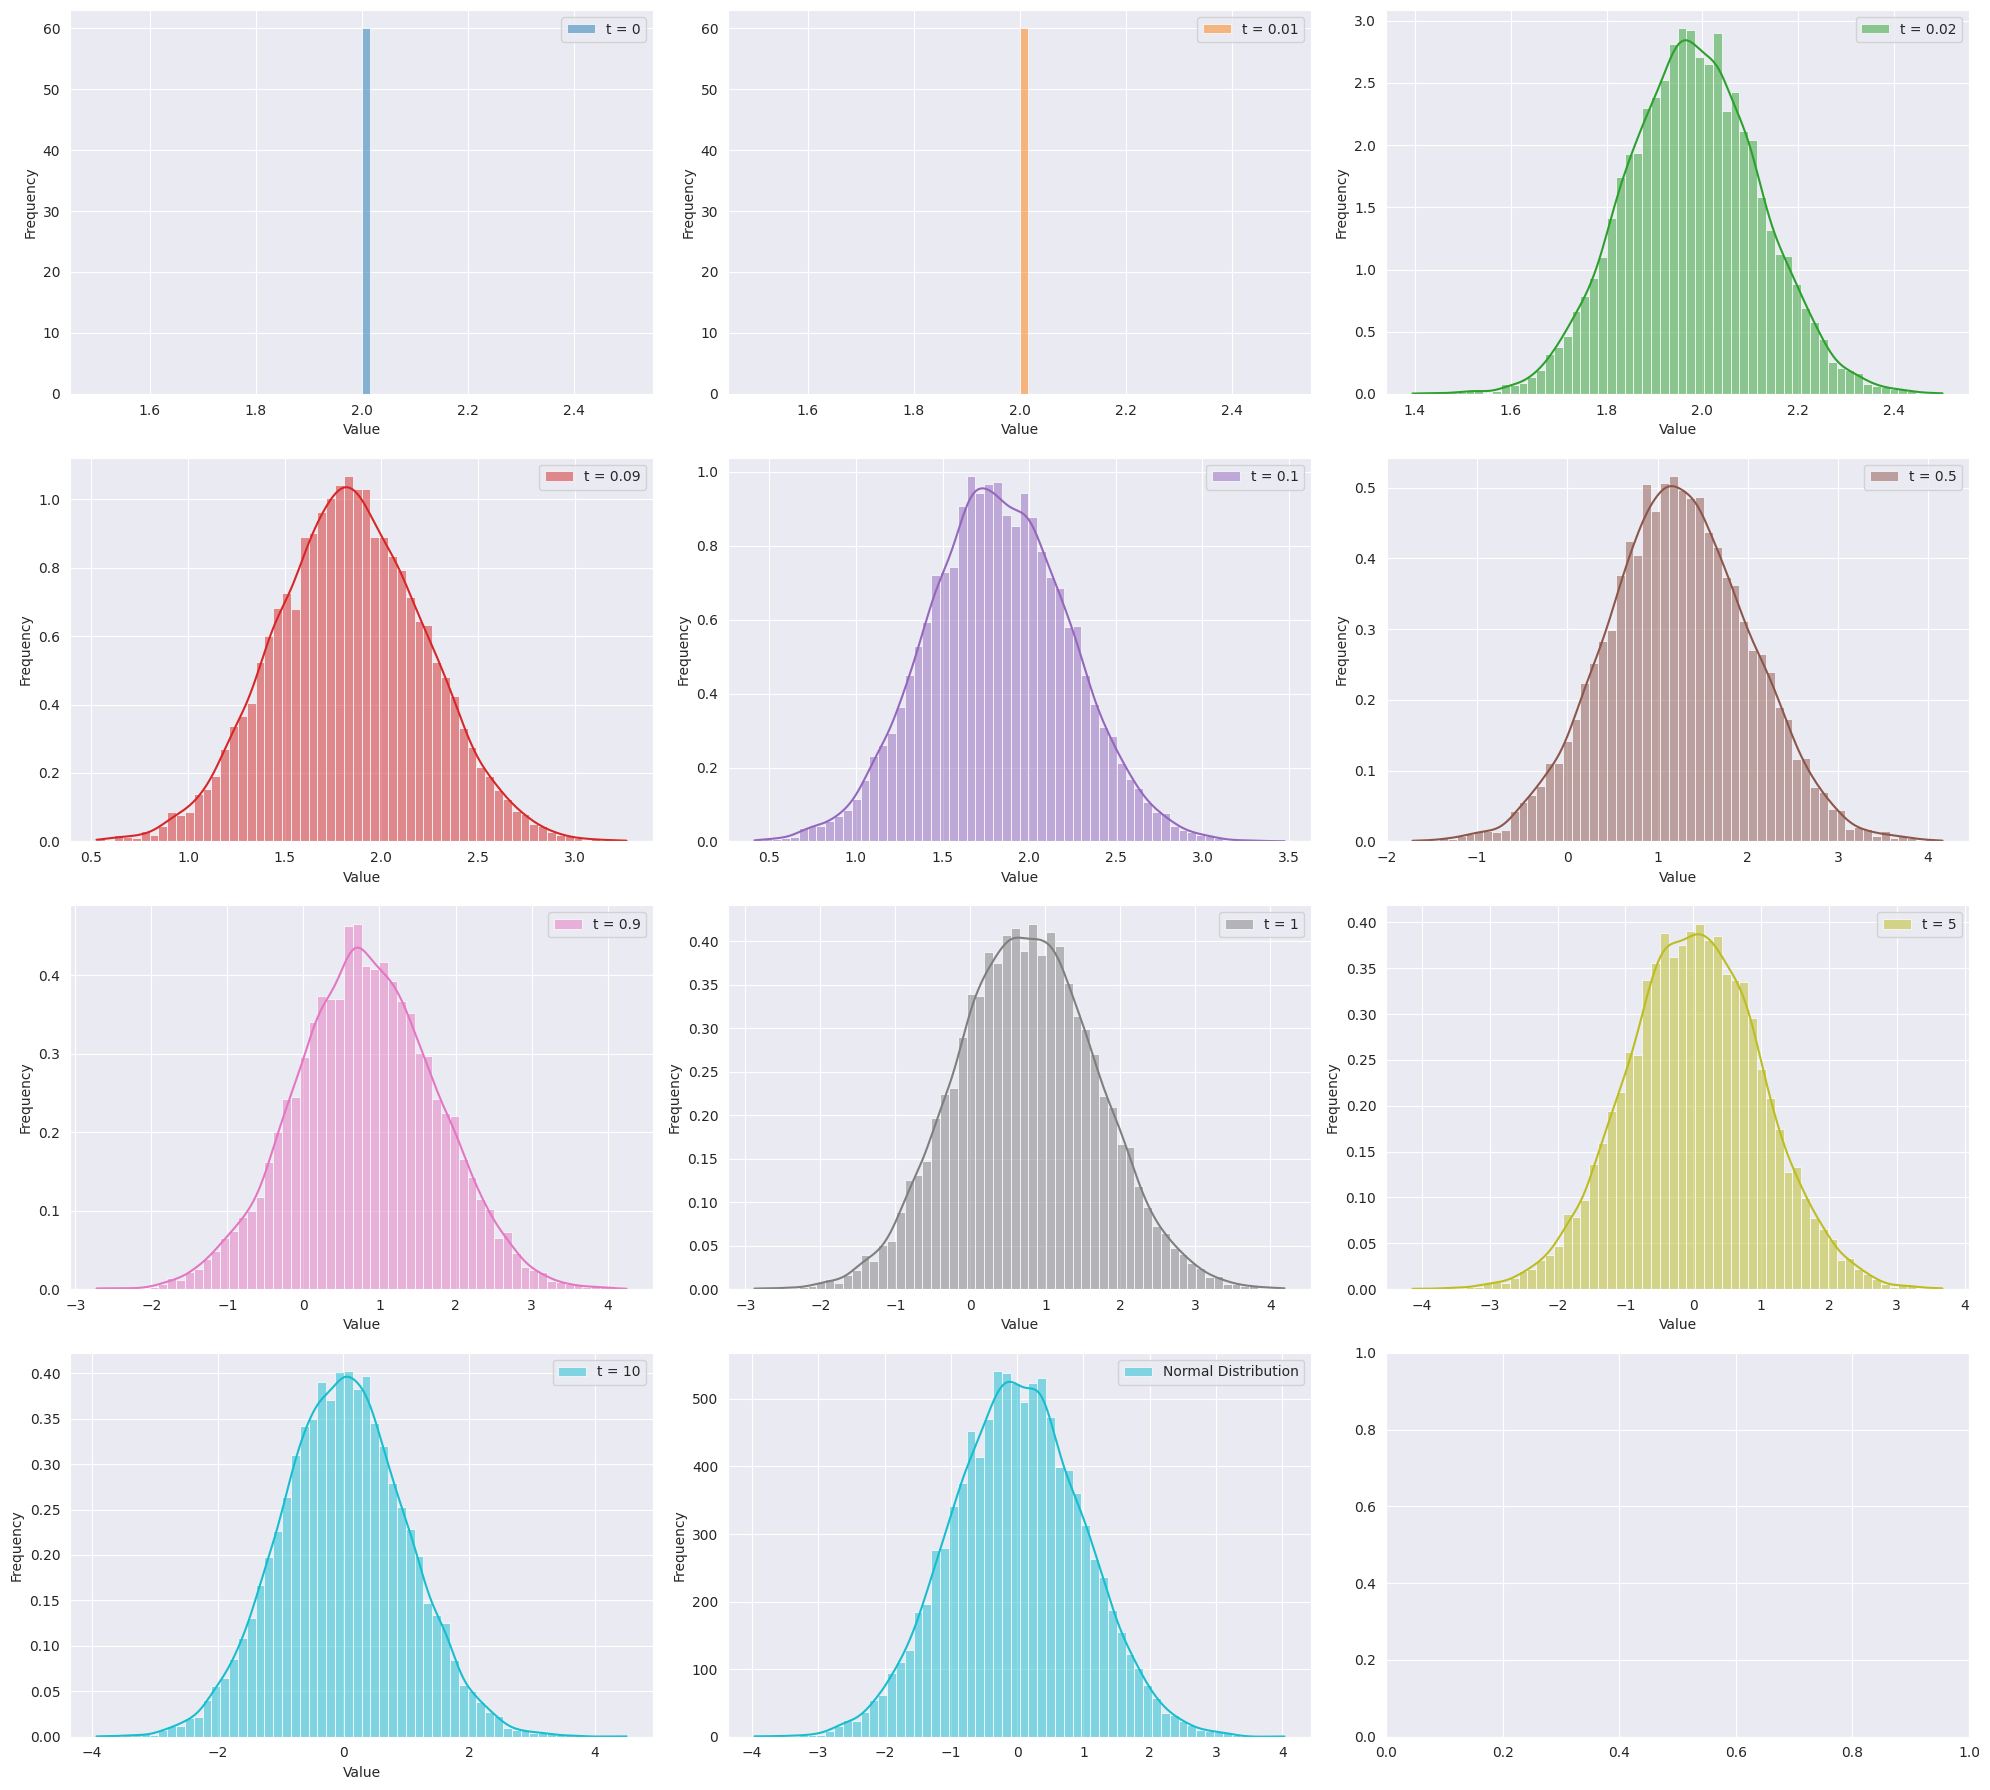

In [5]:
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10]
hist_plt(time_points, sim_mat,bins = 60, alp = 0.5)

## Problem 1.3

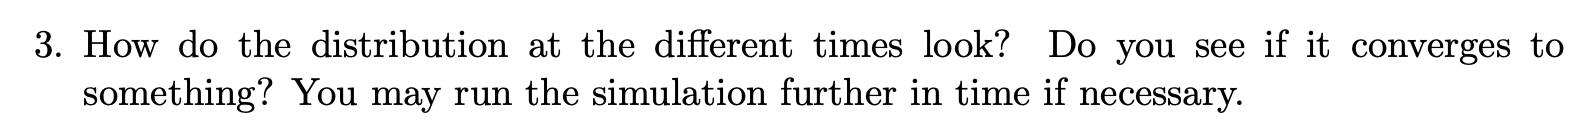

We see that the distributions, except for time=0, where $X_0=x_0$ a.s, at time $t\in\{0.5,1,10\}$, given $X_0=x_0$, are all normal and they seem to converge to a standard normal distribution. This makes sense since $X_t$ has mean $x_0(1-\Delta_t)^{\frac{t}{\Delta_t}}$ that if $t\to\infty$ goes to  and it's normally distributed since the sum of independent normals ($X_{t-1}$,$\xi_t$) is still a normal variable.

Therefore, distribution over time converge to a normal distribution with mean as 0 and variance 1, since it's most of the support is seen to be inside the values of -2.75 and 2.75

## Problem 1.4

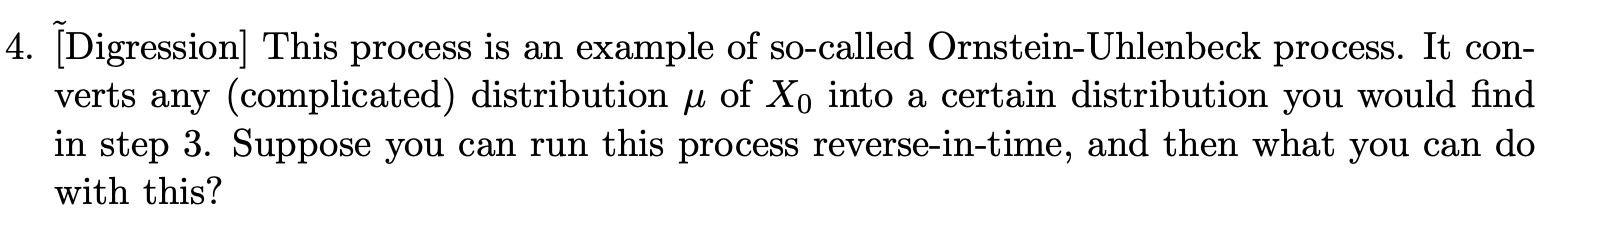

- The Ornstein-Uhlenbeck process is a stochastic process that describes the evolution of a particle undergoing Brownian motion with a mean-reverting behavior.
- In the equation $x_{n+1} = x_n - x_n*∆t + \sqrt{2∆t}*\xi_n$, the term $x_n - x_n*∆t$ represents the mean-reverting component, while the term $\sqrt{2∆t}$ $\xi_n$ represents the random fluctuation or noise.
- If we could run this process reverse-in-time, it would allow us to generate samples from a distribution that converges to the distribution observed in step 3.
- Specifically, starting from the distribution at time t = 10, we could simulate the process backward to obtain samples from the distribution at earlier times, such as t = 1, t = 0.5, and t = 0 . This reverse simulation can be useful in various scenarios.
- For example, if we have observed the final distribution at a particular time and want to understand how the system evolved over time to reach that distribution, we can use the reverse-in-time simulation to trace back the possible paths and distributions at earlier times.
- In summary, running the Ornstein-Uhlenbeck process reverse-in-time allows we to obtain samples from the distributions observed at earlier times, providing insights into the dynamics and evolution of the system.

In [6]:
final_t = 10
dt = 0.01
num_sim = 10_000 # Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) # List of time steps to observe value on, we start with dt since we are prefilling with x_0 already.

sim_mat_rev = np.empty((num_sim, len(T) + 1), dtype='float32') # Matrix to store each of the 10K simulated processes

sim_mat_rev[:, -1] = sim_mat[:,-1] # Setting the final x_N for every simulation i.e., value at t = final_t
sim_mat_rev[:, -1], sim_mat_rev.shape

(array([-0.18843554, -0.26940644, -1.03041   , ...,  0.7256337 ,
         0.7212883 , -0.8937231 ], dtype=float32),
 (10000, 1000))

In [7]:
# Simulating each individual process in reverse time for dt time steps till final_t
for i in range(len(T), 0, -1):
    # Getting the new x_n-1 for all simulations at time n, by utilizing the values of x at time n
    # x_n-1 = (x_n - np.sqrt(2*dt)*np.random.randn()) / (1 - dt)
    x_n_1 = (sim_mat_rev[:, i] - np.sqrt(2 * dt) * np.random.randn(num_sim)) / (1 - dt)

    # Setting the columns at nth time step with the obtained value
    sim_mat_rev[:, i - 1] = x_n_1

In [8]:
sim_mat_rev[:, 0], sim_mat_rev.shape

(array([-14060.078 , -20084.602 ,    423.0237, ...,  35612.867 ,
         34446.617 , -22362.834 ], dtype=float32),
 (10000, 1000))

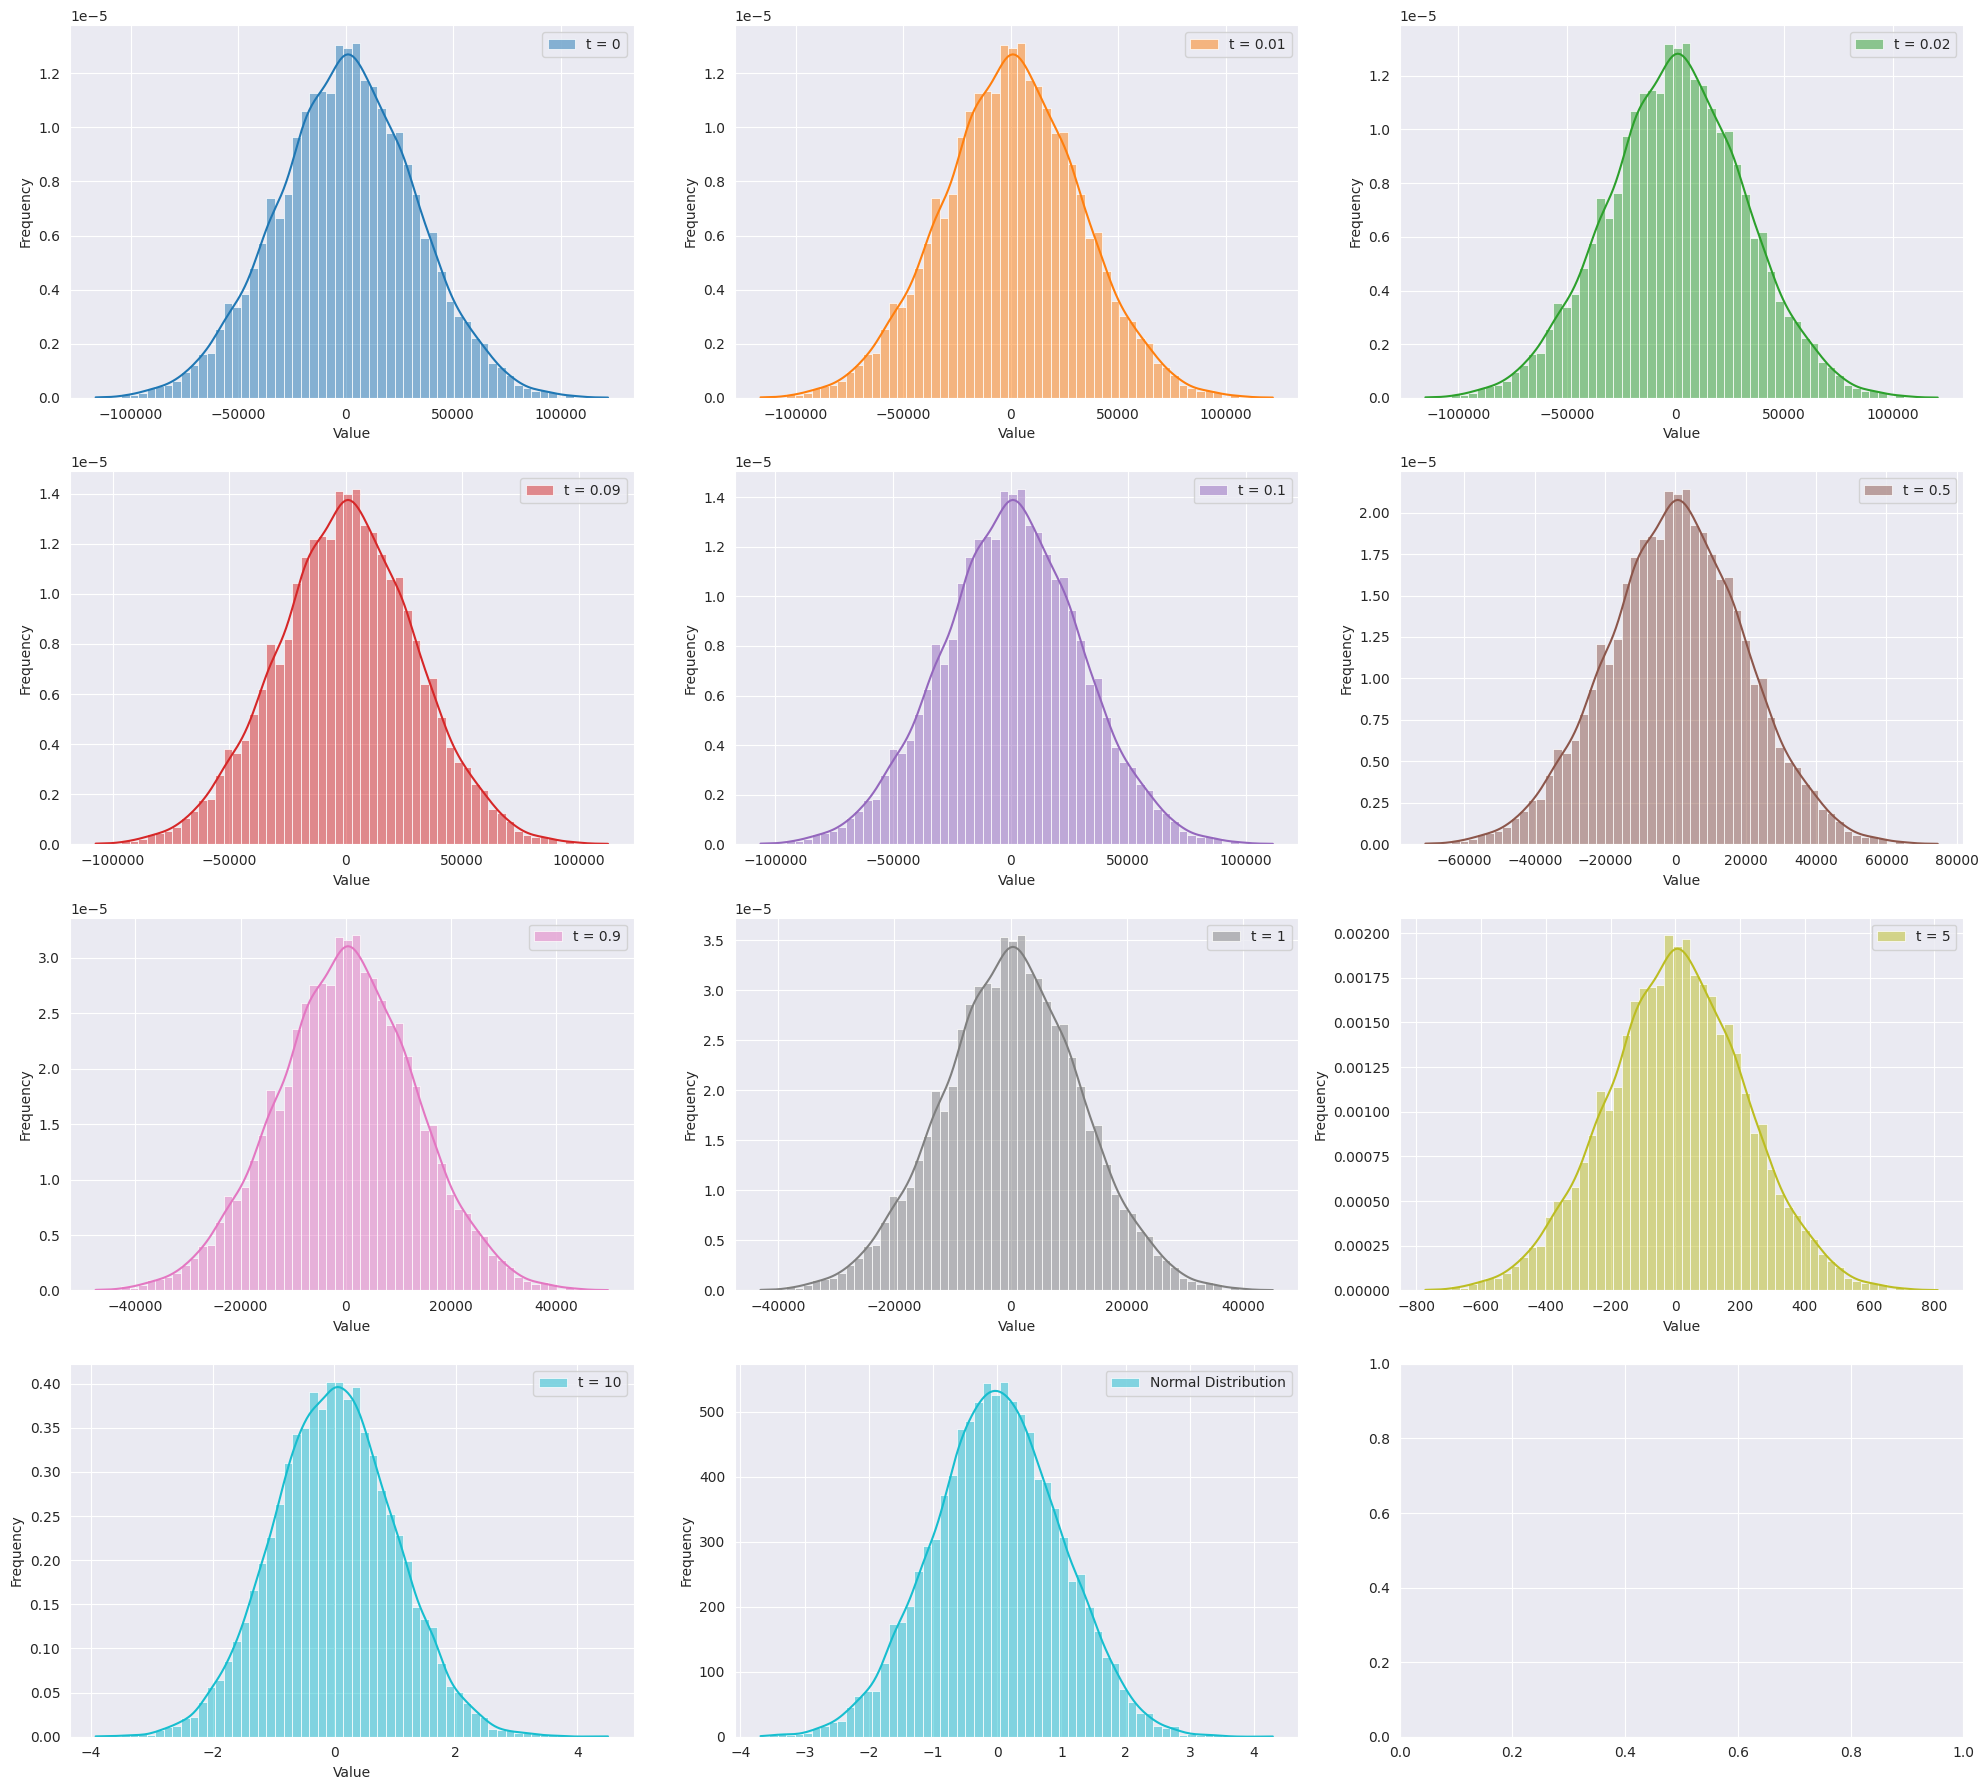

In [9]:
hist_plt(time_points, sim_mat_rev,bins = 60, alp = 0.5)

# Problem 2


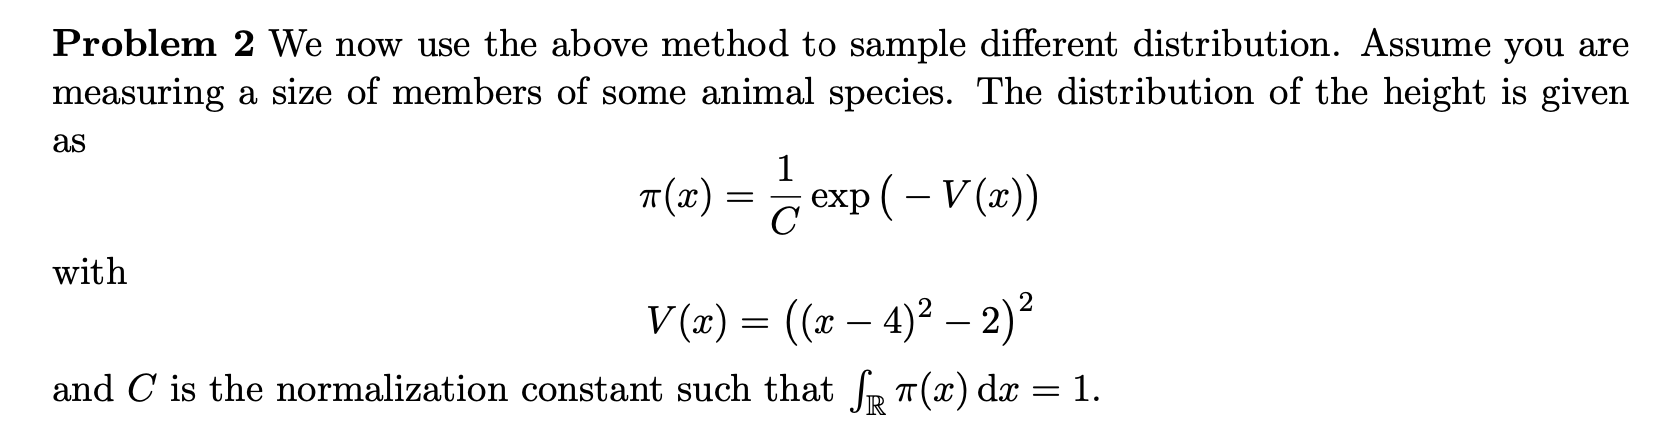

## Problem 2.1

Plot π on suitable interval with C = 1.

In [10]:
dt = 0.001
T = 8
X = np.arange(0, T + dt, dt)
C = 1

def pi(x, C):
    val = ((x - 4) ** 2 - 2) ** 2
    prob = (1 / C) * np.exp(-1 * val)
    return prob

# Vectorized calculation
Y = pi(X, C)

$\pi$ is symmetric w.r.t 4 and tends to 0 if $x\to +-\infty$, therefore we plot it in $[4-5,4+5]$.

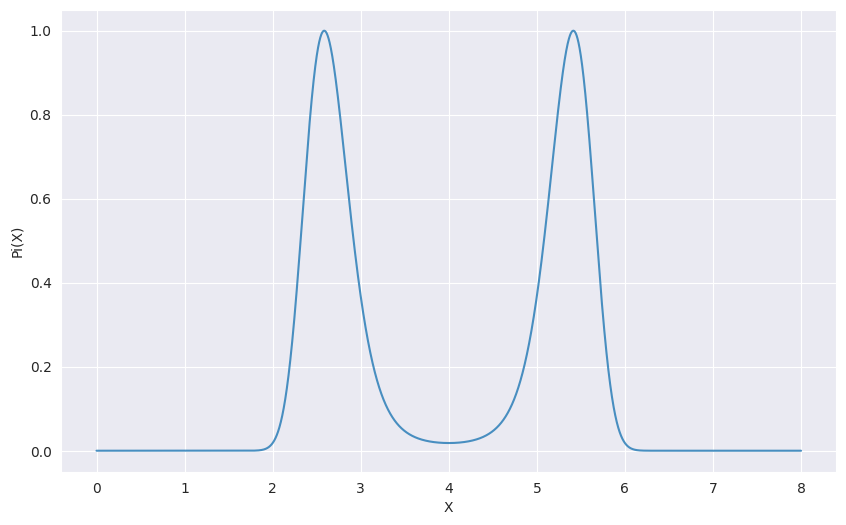

In [13]:
fig, axs = plt.subplots(figsize = (10,6))
sns.lineplot(x = X,y=Y,alpha=0.8, ax = axs)
axs.set(xlabel = "X", ylabel = "Pi(X)")
plt.show()

#### Observation

- Considering X as the heights of the animals, from the plot we can observe most probable heights of the animals are in the range of 2 to 3 and 5 to 6

## Problem 2.2

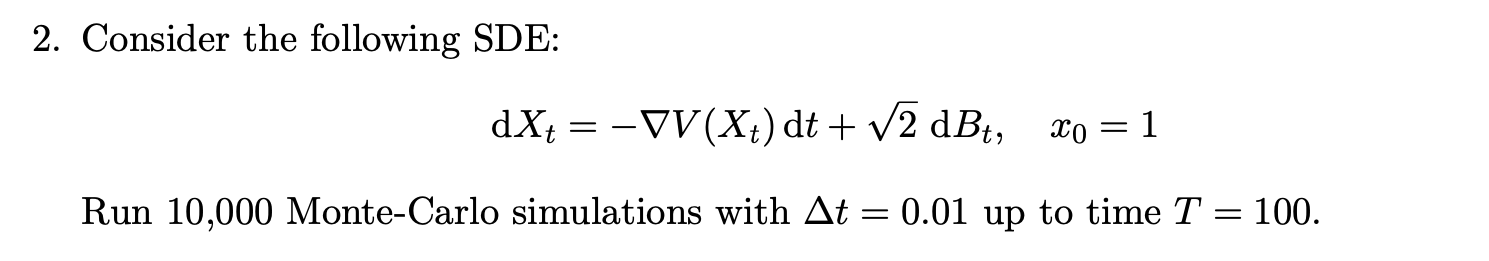

$\frac{X_{t+\Delta t}-X_t}{\Delta_t}\approx \frac{dX_t}{dt}=-\nabla V(X_t)+\sqrt{2}(B_{\Delta_t+t}-B_t)/\Delta t$, then the Euler method in this case is: <br>
$x_{n+1}=-\nabla V(x_n)\Delta t + \sqrt{2 \Delta t}\xi_n$, where $\xi_n\sim N(0,1)$.

In [14]:
final_t = 100
dt = 0.01
x_n = 1 # value for x_0
num_sim = 10_000 #Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) #list or time steps to observe value on, we start with dt, since we are prefilling with x_0 already.

sim_mat = np.empty((num_sim,len(T)+1),dtype = 'float32') # Matrix to store each of 10K simulated processes

sim_mat[:, 0] = x_n #Settign initial x_0 for every simulation i.e value at t = 0
sim_mat[:,0], sim_mat.shape

(array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), (10000, 10000))

 $  \nabla(((x - 4)^2 - 2)^2) = (4(-2+(-4+x)^2)*(-4+x))= (-8+4(-4+x)^2)*(-4+x) = 4(x-4)^3 - 8(x-4)$

In [15]:
# Simulating each individual process for dt time steps till final_t
vals = sim_mat[:, 0]  # Initial values

for i in range(1, len(T) + 1):
    # Compute val_tr for all simulations
    val_tr = (4 * (vals - 4) ** 3 - 8 * (vals - 4)) * dt

    # Generate all random numbers for this iteration
    random_nums = np.sqrt(2 * dt) * np.random.randn(num_sim)

    # Compute the new values for all simulations at once
    x_n_1 = vals - val_tr + random_nums

    # Update vals with the new values for the next iteration
    vals = x_n_1

    # Setting the columns at nth time step with the obtained value
    sim_mat[:, i] = x_n_1

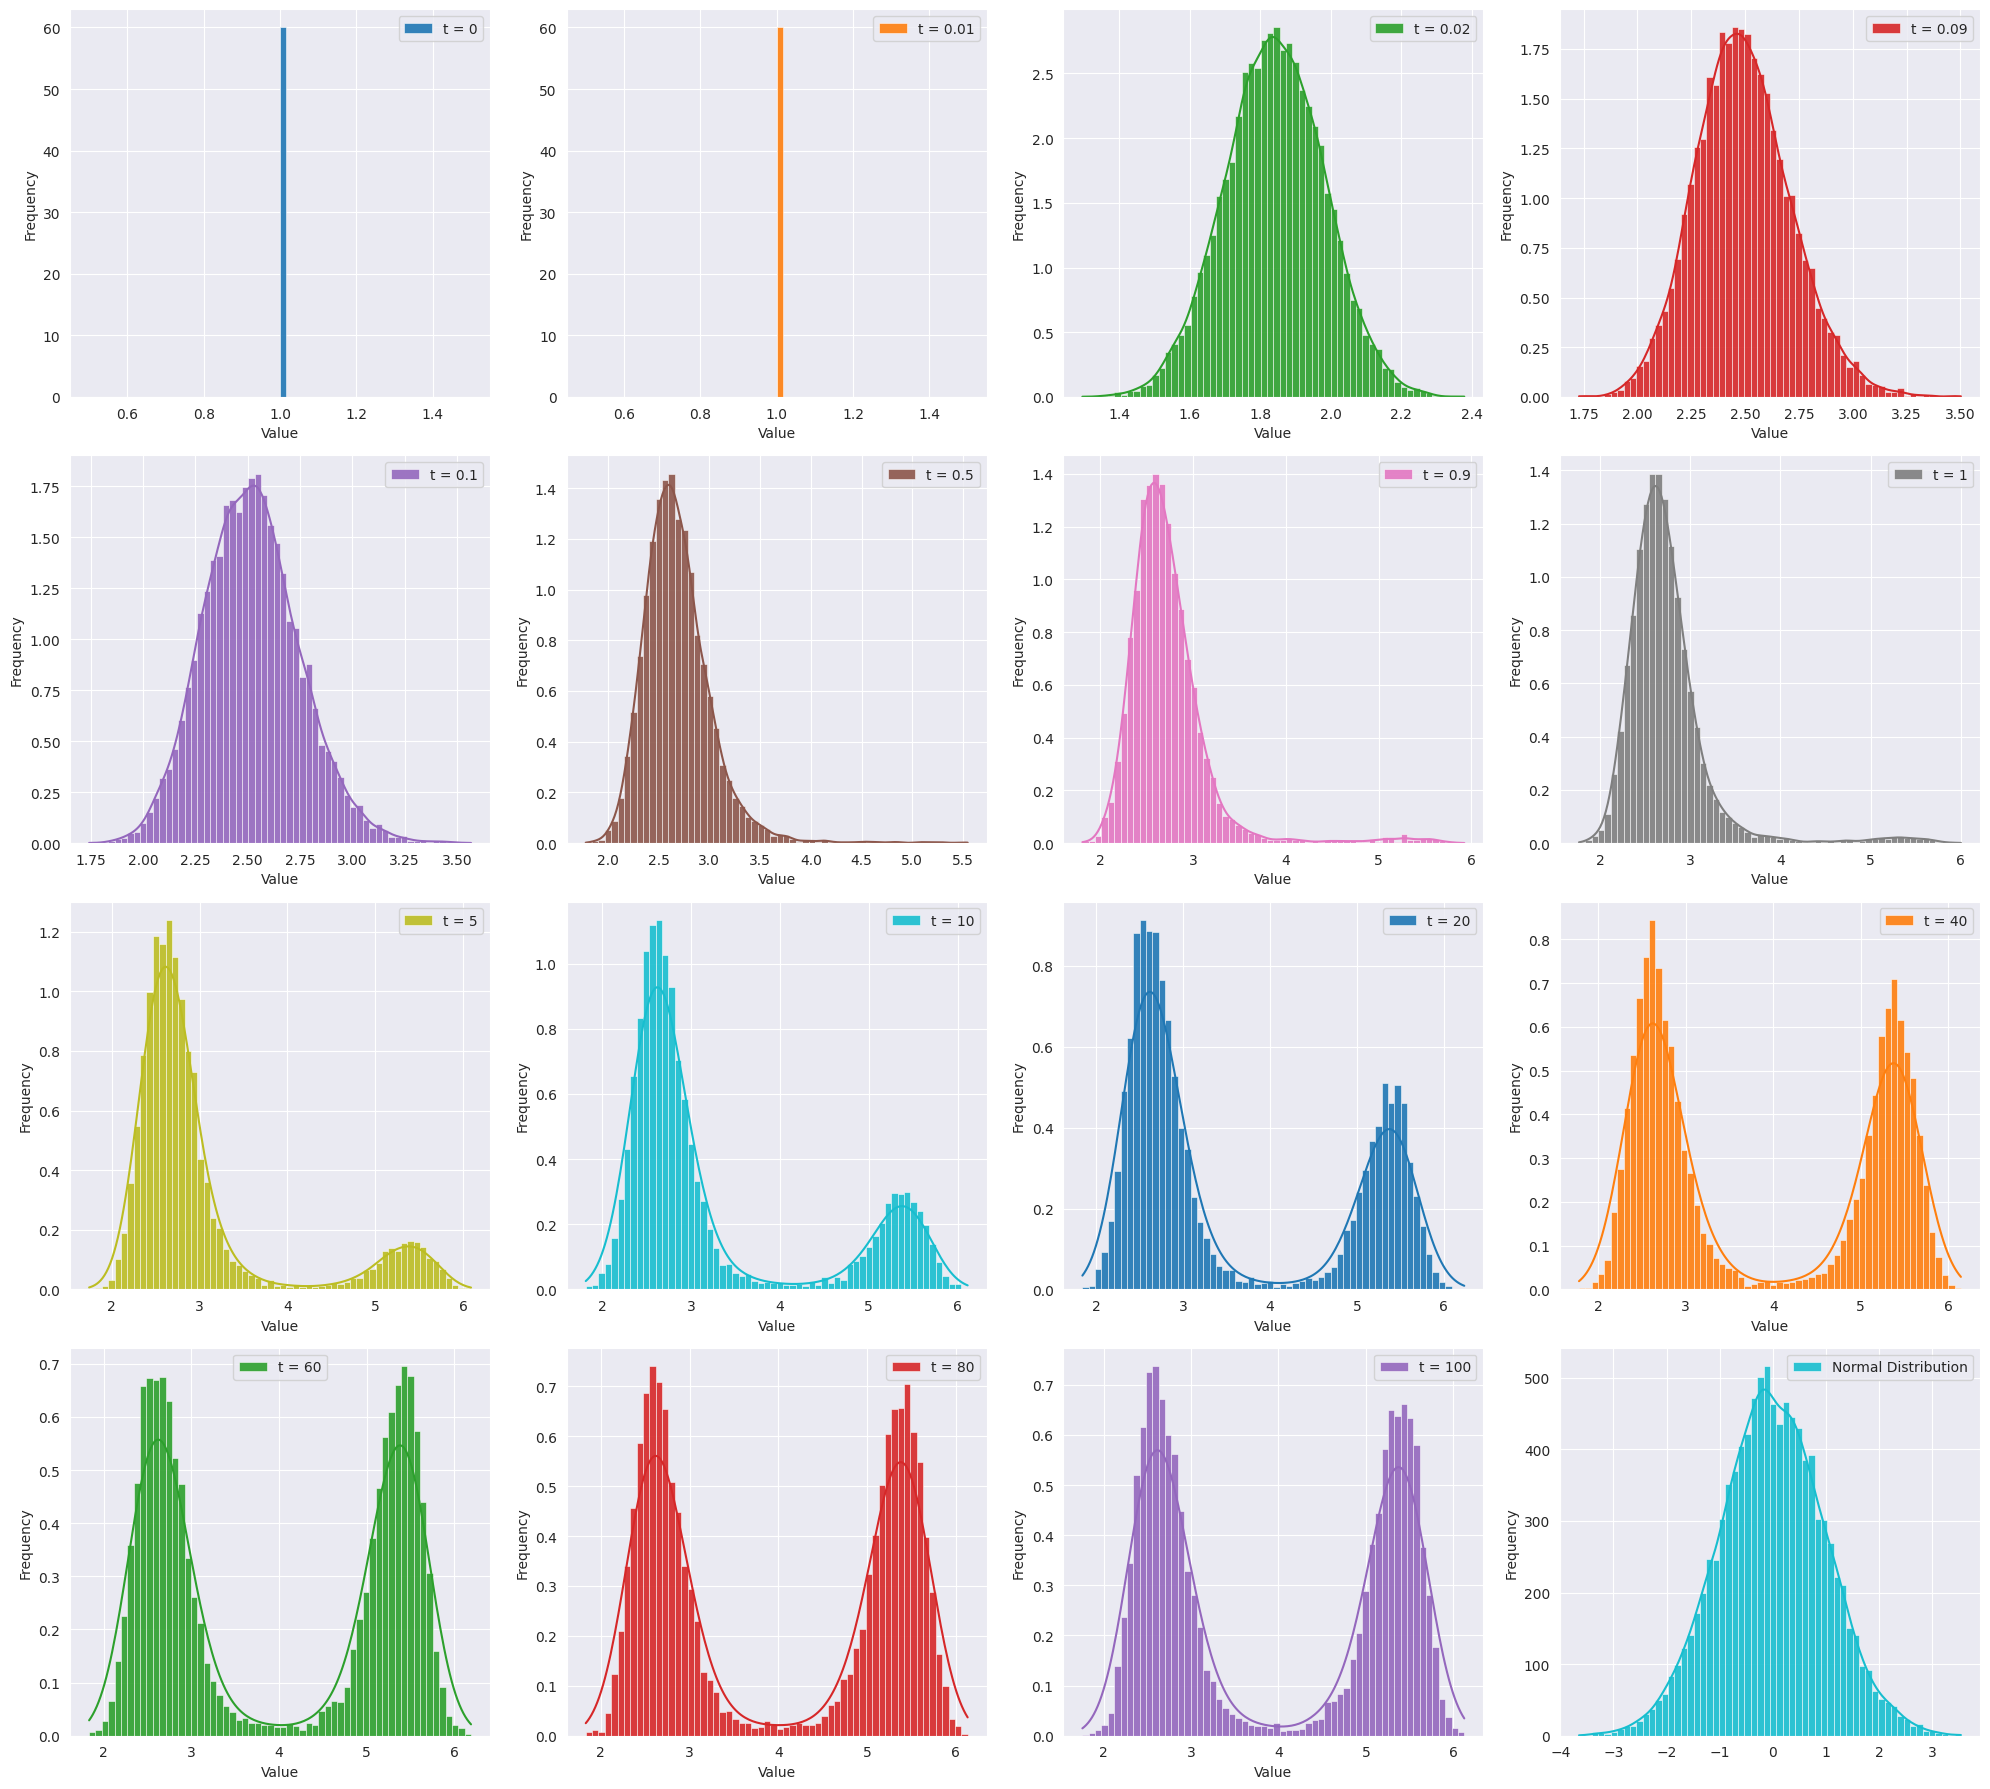

In [16]:
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10,20,40,60,80,100]
hist_plt(time_points, sim_mat,60,alp=0.9)

## Problem 2.3

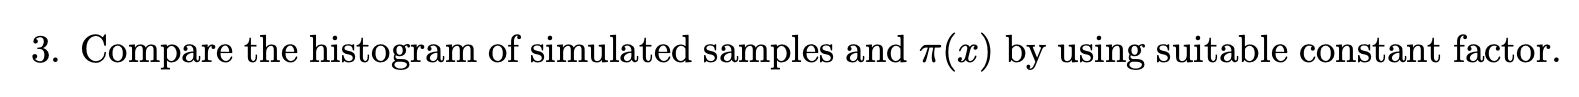

- By comparing the histograms of simulated samples to the plots of height distribution, it seems that both are converging to a random variable with density  𝜋(𝑥) .

## Problem 2.4

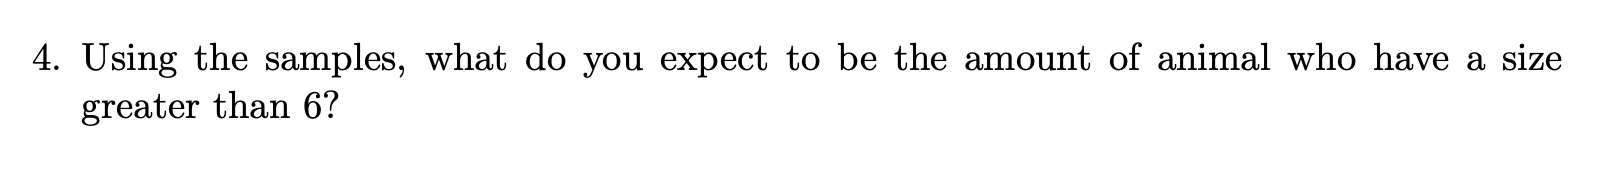

In [17]:
# Initialize counters
count_2_3 = 0
count_5_6 = 0
count_gt_6 = 0

# We can use sim_mat instead of sim_mat.T, since we just have to count across whole matrix.
# Count observations between 2 and 3
count_2_3 = np.sum(np.logical_and(sim_mat.T >= 2, sim_mat.T <= 3))

# Count observations between 5 and 6
count_5_6 = np.sum(np.logical_and(sim_mat.T >= 5, sim_mat.T <= 6))

# Count observations greater than 6
count_gt_6 = np.sum(sim_mat.T > 6)

# Total observations
size = np.size(sim_mat)

# Print the counts
print(f"Count of values between 2 and 3: {count_2_3} with prob {count_2_3/size}")
print(f"Count of values between 5 and 6: {count_5_6} with prob {count_5_6/size}")
print(f"Count of values greater than 6: {count_gt_6} with prob {count_gt_6/size}")

Count of values between 2 and 3: 49792877 with prob 0.49792877
Count of values between 5 and 6: 35409608 with prob 0.35409608
Count of values greater than 6: 117333 with prob 0.00117333


- By observing the samples, the amount of animals having height greater than 6 are very less as compared to other heights